In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv('mcdonalds.csv')

In [48]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [49]:
df.shape

(1453, 15)

In [50]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [51]:
from sklearn.preprocessing import OrdinalEncoder
cols=df.iloc[:,:11].columns
encoder=OrdinalEncoder()
df[cols]=encoder.fit_transform(df[cols])

In [52]:
df[cols].mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [53]:
from sklearn.decomposition import PCA
pca=PCA(11)
pca.fit(df[cols])
sample=pca.transform(df[cols])

In [54]:
sample.std(axis=0)
variance=pca.explained_variance_ratio_
cumulative=np.cumsum(variance)
mapp={
    "Standard Deviation":sample.std(axis=0),
    "Variance Proportion":variance,
    "Cummulative Variance":cumulative
}
pd.DataFrame(mapp,index=[f"PC{i}" for i in range(1,12)])

,Standard Deviation,Variance Proportion,Cummulative Variance
PC1,0.756789,0.299447,0.299447
PC2,0.607246,0.192797,0.492244
PC3,0.504446,0.133045,0.625290
PC4,0.398661,0.083096,0.708386
PC5,0.337289,0.059481,0.767866
PC6,0.310168,0.050300,0.818166
PC7,0.289598,0.043849,0.862015
PC8,0.275027,0.039548,0.901563
PC9,0.265160,0.036761,0.938323
PC10,0.248756,0.032353,0.970677


In [55]:
entries=pd.DataFrame(pca.components_.T,index=cols,columns=[f"PC{i}" for i in range(1,12)])
entries

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


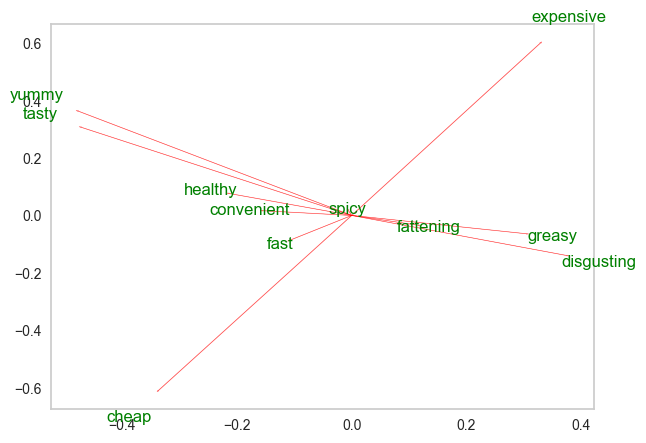

In [56]:
data=pca.transform(df[cols])
loadings = pca.components_.T
#sns.scatterplot(x=data[:,0],y=data[:,1])
for i, var in enumerate(cols):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var, color='green', ha='center', va='center')

plt.grid()
plt.show()

<BarContainer object of 10 artists>

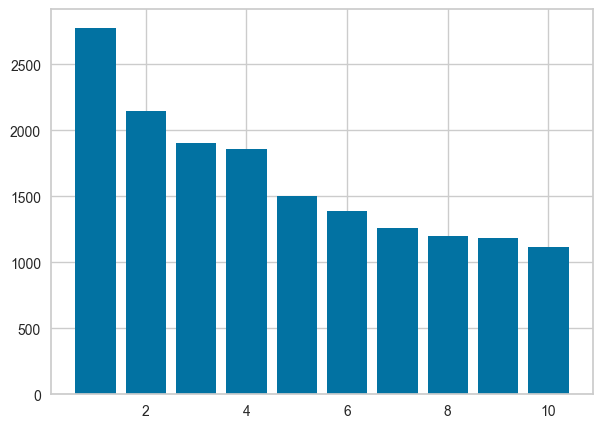

In [57]:
from sklearn.cluster import KMeans
scores=[]
for i in range(1,11):
    kmn=KMeans(n_clusters=i)
    kmn.fit(df[cols])
    scores.append(kmn.inertia_)
plt.bar([i for i in range(1,11)],scores)

In [58]:
df[cols]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1449,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1450,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1451,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


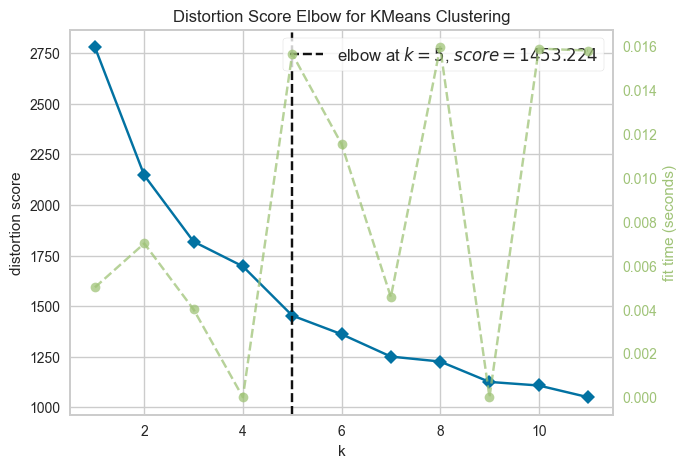

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(estimator=model,k=(1,12)).fit(df[cols])
visualizer.show()

In [60]:
kmn=KMeans(n_clusters=4,init='k-means++').fit(df[cols])
labels=kmn.labels_
print(kmn.inertia_)
print(labels)
print(kmn.cluster_centers_)

1736.10731623741
[0 1 0 ... 0 2 3]
[[0.37741935 0.93870968 0.08387097 0.80645161 0.16451613 0.83870968
  0.18387097 0.46129032 0.72903226 0.1516129  0.06451613]
 [0.88       0.9725     0.115      0.9775     1.         0.9275
  0.6425     0.965      0.3575     0.1675     0.1325    ]
 [0.84143223 0.9769821  0.09207161 0.7084399  0.00767263 0.96930946
  0.91560102 0.95907928 0.03069054 0.40153453 0.01790281]
 [0.01420455 0.73011364 0.07954545 0.97159091 0.88352273 0.84659091
  0.5625     0.09090909 0.39488636 0.05113636 0.77556818]]


In [61]:
pf=pd.DataFrame(pca.transform(df[cols]),columns=[f"PC{i}" for i in range(1,12)])

In [62]:
pf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


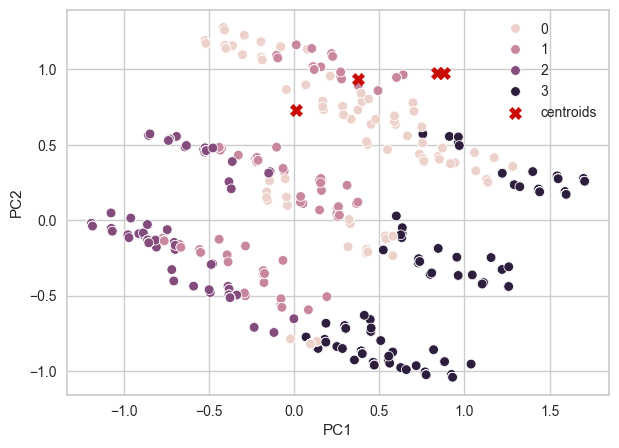

In [63]:
sns.scatterplot(data=pf, x="PC1", y="PC2", hue=kmn.labels_)
plt.scatter(kmn.cluster_centers_[:,0], kmn.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

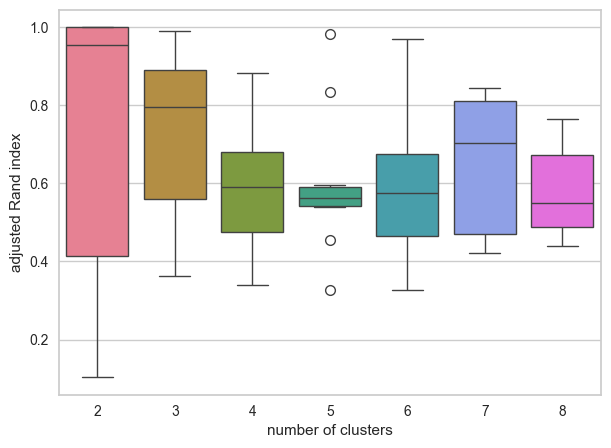

In [64]:
np.random.seed(1234)
from sklearn.metrics import adjusted_rand_score
n_clusters = range(2, 9)
n_reps = 10
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps).fit(df[cols])
    km_labels = km.labels_
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(df[cols])
        km_rep_labels = km_rep.labels_
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    scores.append(score_k)
mapp={}
for i in n_clusters:
    mapp[i]=scores[i-n_clusters[0]]
sns.boxplot(mapp)
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 13.820274961085254, 13.820274961085254, 0.0],
  [0.0, 16.837294569763987, 16.837294569763987, 13.820274961085254],
  [0.0, 23.67244402390833, 23.67244402390833, 16.837294569763987],
  [15.132745950421556,
   24.097479054882314,
   24.097479054882314,
   23.67244402390833],
  [0.0, 18.303005217723125, 18.303005217723125, 0.0],
  [0.0, 22.260923119338788, 22.260923119338788, 18.303005217723125],
  [0.0, 23.646302388396077, 23.646302388396077, 22.260923119338788],
  [0.0, 26.301594692930717, 26.301594692930717, 23.646302388396077],
  [24.097479054882314,
   30.24915897946193,
   30.24915897946193,
   26.301594692930717

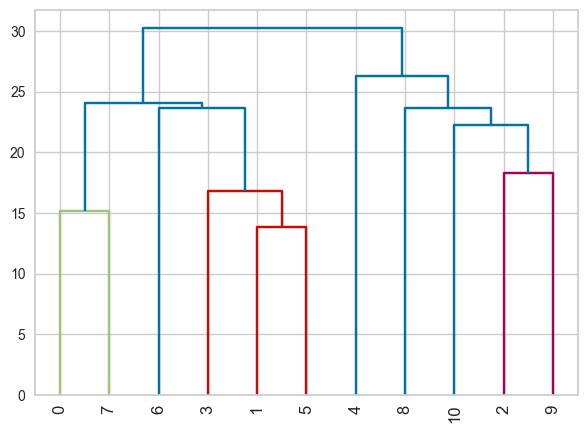

In [88]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
D = np.transpose(df[cols])
D = linkage(D, method = "average")
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

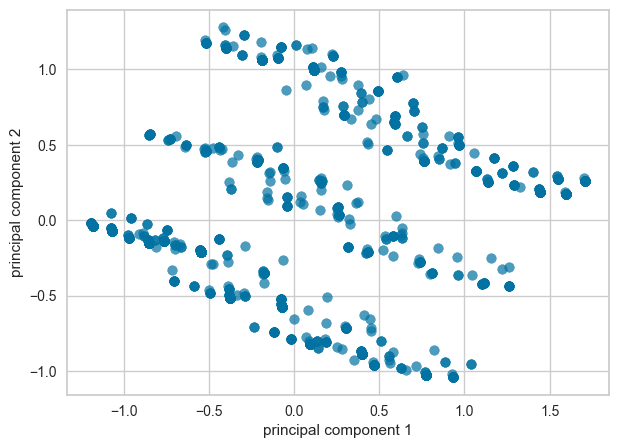

In [66]:
import matplotlib.pyplot as plt

proj_data = pca.fit_transform(df[cols])[:, :2]

plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

In [67]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [68]:
df['cluster_num']=labels

In [69]:
crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab 

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,33,48,43,28,14,14,23,11,54,23,19
1,54,67,80,61,19,10,5,5,39,5,55
2,47,53,101,71,7,2,2,5,32,2,69
3,18,19,5,0,18,33,43,50,44,122,0


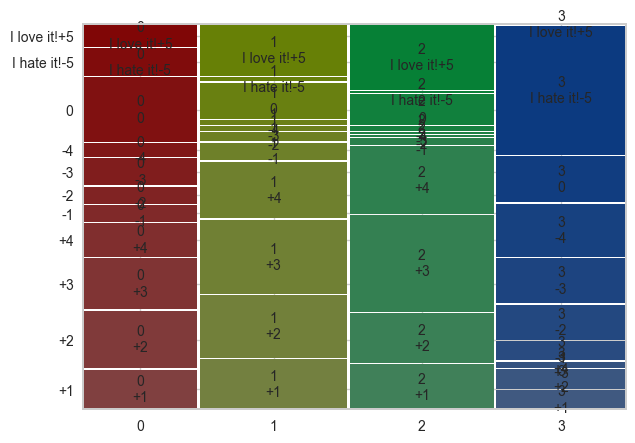

In [70]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [71]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,148,162
1,223,177
2,235,156
3,182,170


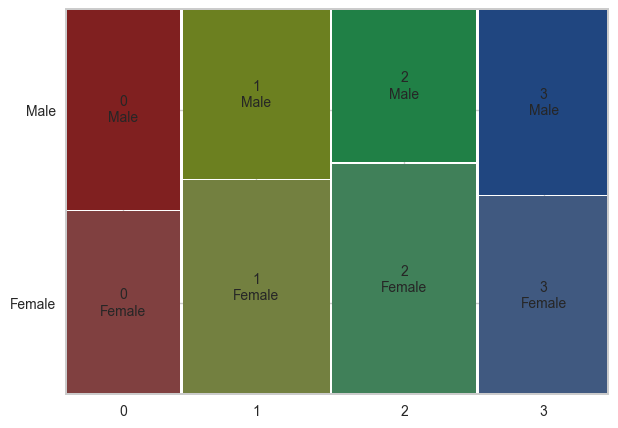

In [72]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

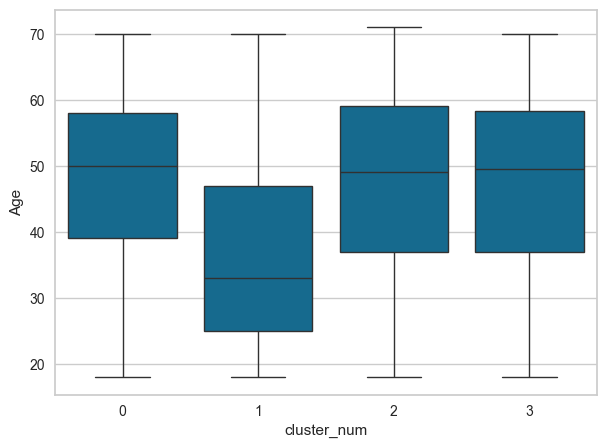

In [73]:
sns.boxplot(x="cluster_num",y="Age", data=df)

In [74]:
from sklearn.preprocessing import LabelEncoder
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.648387
1,1,2.635000
2,2,2.552430
3,3,2.727273


In [75]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,4.477419
1,1,3.770000
2,2,3.879795
3,3,6.602273


In [76]:
df.Like.value_counts()

Like
2     229
1     187
8     169
3     160
0     152
9     152
10    143
6      73
7      71
5      59
4      58
Name: count, dtype: int64

In [77]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.522581
1,1,0.442500
2,2,0.398977
3,3,0.482955


In [78]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.522581,4.477419,2.648387
1,1,0.442500,3.770000,2.635000
2,2,0.398977,3.879795,2.552430
3,3,0.482955,6.602273,2.727273


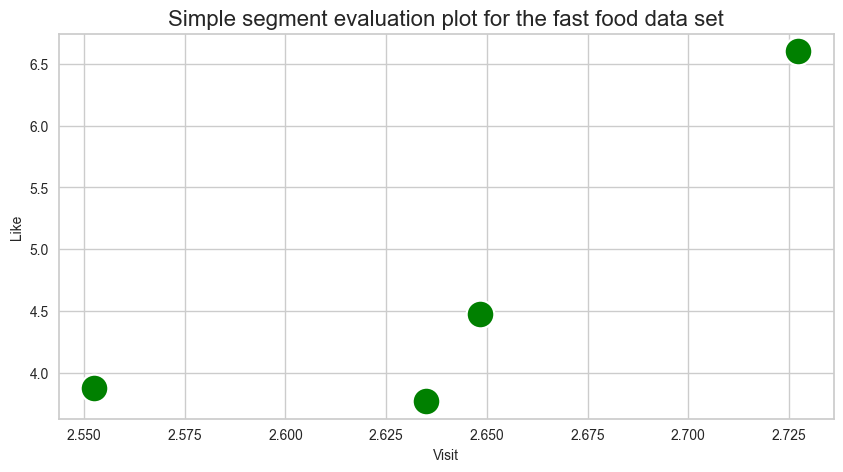

In [81]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="green")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()